In [68]:
from aiondata import BindingDB

# Load BindingDB into a Polars DataFrame
bindingdb_df = BindingDB().to_df()

#choose columns :Ki (nM)	IC50 (nM)	Kd (nM)	EC50 (nM)	kon (M-1-s-1)	koff (s-1)	pH	Temp 
bindingdb_df = bindingdb_df.select([
    "BindingDB Reactant_set_id",
    "PDB ID(s) for Ligand-Target Complex",
    # "PDB ID(s) of Target Chain",
    "Ligand HET ID in PDB",
    "UniProt (SwissProt) Primary ID of Target Chain",
    "SMILES",
    "Ki (nM)",
    "IC50 (nM)",
    "Kd (nM)",
    "EC50 (nM)",
    "kon (M-1-s-1)",
    "koff (s-1)",
    "pH",
    "Temp C",
    "BindingDB Target Chain Sequence",
    "Target Source Organism According to Curator or DataSource",
    "Curation/DataSource",
    "Number of Protein Chains in Target (bigger than 1 implies a multichain complex)"
])

bindingdb_df = bindingdb_df.rename(
    {
        "Number of Protein Chains in Target (bigger than 1 implies a multichain complex)": "Chain number",
        "BindingDB Target Chain Sequence": "Sequence",
        "Target Source Organism According to Curator or DataSource": "Organism",
        "Curation/DataSource": "Source",
    })
bindingdb_df = bindingdb_df.to_pandas()
#PDB ID(s) of Target Chain column have multiple values separated by ,. We need to split them and create a new row for each value
bindingdb_df = bindingdb_df.assign(
    **{"PDB ID(s) for Ligand-Target Complex": bindingdb_df["PDB ID(s) for Ligand-Target Complex"].str.split(",")}
)#.explode("PDB ID(s) for Ligand-Target Complex")
#remove PDB ID(s) for Ligand-Target Complex with None
#bindingdb_df = bindingdb_df.dropna(subset=["PDB ID(s) for Ligand-Target Complex"])

bindingdb_df

/Users/tomshani/Desktop/CLLP/ProphetGit/aiondata/.venv/lib/python3.11/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(


,BindingDB Reactant_set_id,PDB ID(s) for Ligand-Target Complex,Ligand HET ID in PDB,UniProt (SwissProt) Primary ID of Target Chain,SMILES,Ki (nM),IC50 (nM),Kd (nM),EC50 (nM),kon (M-1-s-1),koff (s-1),pH,Temp C,Sequence,Organism,Source,Chain number
0,1.0,None,None,P03367,[H]OC(=O)C([H])([H])C([H])([H])C([H])([H])C([H...,0.24,NaN,NaN,NaN,NaN,NaN,5.5,37.0,PQITLWQRPL VTIKIGGQLK EALLDTGADD TVLEEMSLPG RW...,Human immunodeficiency virus 1,Curated from the literature by BindingDB,1.0
1,2.0,None,None,P03367,[H]O[C@]1([H])[C@@]([H])(O[H])[C@@]([H])(C([H]...,0.25,NaN,NaN,NaN,NaN,NaN,5.5,37.0,PQITLWQRPL VTIKIGGQLK EALLDTGADD TVLEEMSLPG RW...,Human immunodeficiency virus 1,Curated from the literature by BindingDB,1.0
2,3.0,None,None,P03367,[H]O[C@]1([H])[C@@]([H])(O[H])[C@@]([H])(C([H]...,0.41,NaN,NaN,NaN,NaN,NaN,5.5,37.0,PQITLWQRPL VTIKIGGQLK EALLDTGADD TVLEEMSLPG RW...,Human immunodeficiency virus 1,Curated from the literature by BindingDB,1.0
3,4.0,None,None,P03367,[H]OC([H])([H])C([H])([H])C([H])([H])C([H])([H...,0.80,NaN,NaN,NaN,NaN,NaN,5.5,37.0,PQITLWQRPL VTIKIGGQLK EALLDTGADD TVLEEMSLPG RW...,Human immunodeficiency virus 1,Curated from the literature by BindingDB,1.0
4,5.0,None,None,P03367,[H]OC([H])([H])C([H])([H])C([H])([H])C([H])([H...,0.99,NaN,NaN,NaN,NaN,NaN,5.5,37.0,PQITLWQRPL VTIKIGGQLK EALLDTGADD TVLEEMSLPG RW...,Human immunodeficiency virus 1,Curated from the literature by BindingDB,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2826929,51508326.0,"[4A79, 7M26, 2XKW]",P1B,P37231,[H]c1nc(C([H])([H])C([H])([H])Oc2c([H])c([H])c...,NaN,NaN,NaN,6700.0,NaN,NaN,NaN,NaN,None,Homo sapiens,ChEMBL,1.0
2826930,51508327.0,None,None,Q03181,COc1cccc2ccc(-c3cc(-c4ccc5cccc(OC)c5c4O)c4cccc...,NaN,NaN,NaN,53900.0,NaN,NaN,NaN,NaN,None,None,ChEMBL,1.0
2826931,51508328.0,[5U46],7T1,Q03181,[H]OC(=O)C([H])([H])Oc1c([H])c([H])c(SC([H])([...,NaN,NaN,NaN,700.0,NaN,NaN,NaN,NaN,None,None,ChEMBL,1.0
2826932,51508329.0,"[3LBD, 1FM6, 1FM9, 6A60, 3OAP, 3UVV, 5JI0, 1XI...",9CR,P19793,[H]OC(=O)/C([H])=C(C(/[H])=C([H])/C([H])=C(C(\...,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,MDTKHFLPLDFSTQVNSSLTSPTGRGSMAAPSLHPSLGPGIGSPGQ...,Homo sapiens,ChEMBL,1.0


In [145]:
param="IC50 (nM)"
#param="Kd (nM)"

#how many rows have and dont have kd (nM) values 
nkd=bindingdb_df[param].notna().sum()
ykd=bindingdb_df[param].isna().sum()
print(f"{param} values rows: ",nkd)
print(f"No {param} values rows: ",ykd)
print("Percent: ",round(nkd*100/(nkd+ykd),2),"%")

print("\n")
#how many rows dont have sequence and uniport id together
missing_both = bindingdb_df['Sequence'].isna() & bindingdb_df['UniProt (SwissProt) Primary ID of Target Chain'].isna()
num_missing_both = missing_both.sum()
print("Number of rows missing both Sequence and UniProt ID: ", num_missing_both)
print("Percent: ", round(num_missing_both*100/len(bindingdb_df), 2), "%")

print("\n")
#how many rows have and dont have uniport id values
param2="UniProt (SwissProt) Primary ID of Target Chain"
nkd=bindingdb_df[param2].notna().sum()
ykd=bindingdb_df[param2].isna().sum()
print(f"{param2} values rows: ",nkd)
print(f"No {param2} values rows: ",ykd)
print("percent: ",round(nkd*100/(nkd+ykd),2),"%")


#remove rows with missing values in param (IC50 (nM) or Kd (nM))
bindingdb_df2 = bindingdb_df.dropna(subset=[param])

#remove rows with missing values in both sequence and uniprot id
bindingdb_df2 = bindingdb_df2[~(bindingdb_df2['Sequence'].isna() & bindingdb_df2['UniProt (SwissProt) Primary ID of Target Chain'].isna())]

print("\n")
print("Current length of bindingdb_df2: ",len(bindingdb_df2))


bindingdb_df2


IC50 (nM) values rows:  1878820
No IC50 (nM) values rows:  948114
Percent:  66.46 %


Number of rows missing both Sequence and UniProt ID:  50836
Percent:  1.8 %


UniProt (SwissProt) Primary ID of Target Chain values rows:  2743469
No UniProt (SwissProt) Primary ID of Target Chain values rows:  83465
percent:  97.05 %


Current length of bindingdb_df2:  1843338


,BindingDB Reactant_set_id,PDB ID(s) for Ligand-Target Complex,Ligand HET ID in PDB,UniProt (SwissProt) Primary ID of Target Chain,SMILES,Ki (nM),IC50 (nM),Kd (nM),EC50 (nM),kon (M-1-s-1),koff (s-1),pH,Temp C,Sequence,Organism,Source,Chain number
142,143.0,None,None,P08684,[H]c1nc2c(nc(-c3c(C([H])([H])[H])nn(C([H])([H]...,NaN,50500.0,NaN,NaN,NaN,NaN,NaN,NaN,MALIPDLAMETWLLLAVSLVLLYLYGTHSHGLFKKLGIPGPTPLPF...,Homo sapiens,US Patent,1.0
144,145.0,None,None,P51570,[H]c1c([H])c([H])c2oc(N([H])C3=N[C@@]4(C5=C(N3...,NaN,6676.9,NaN,NaN,NaN,NaN,NaN,NaN,None,None,US Patent,1.0
180,181.0,"[1HIH, 1HII]",C20,P12497,[H]O[C@@]([H])(C([H])([H])N(N([H])C(=O)[C@@]([...,NaN,8.5,NaN,NaN,NaN,NaN,6.0,37.0,PQITLWQRPL VTIKIGGQLK EALLDTGADD TVLEEMNLPG RW...,Human immunodeficiency virus 1,Curated from the literature by BindingDB,1.0
181,182.0,None,None,P12497,[H]O[C@@]([H])(C([H])([H])N(N([H])C(=O)[C@@]([...,NaN,177.0,NaN,NaN,NaN,NaN,6.0,37.0,PQITLWQRPL VTIKIGGQLK EALLDTGADD TVLEEMNLPG RW...,Human immunodeficiency virus 1,Curated from the literature by BindingDB,1.0
183,184.0,None,None,P12497,[H]O[C@@]([H])(C([H])([H])N(N([H])C(=O)[C@@]([...,NaN,164.0,NaN,NaN,NaN,NaN,6.0,37.0,PQITLWQRPL VTIKIGGQLK EALLDTGADD TVLEEMNLPG RW...,Human immunodeficiency virus 1,Curated from the literature by BindingDB,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2826910,51508307.0,None,None,P17706,COc1ccc2c(c1O)C(=O)c1cc(O[C@@H]3O[C@H](CO[C@@H...,NaN,101000.0,NaN,NaN,NaN,NaN,NaN,NaN,MPTTIEREFEELDTQRRWQPLYLEIRNESHDYPHRVAKFPENRNRN...,Homo sapiens,ChEMBL,1.0
2826911,51508308.0,None,None,P17706,Cc1c(O[C@@H]2O[C@H](CO[C@@H]3OC[C@@H](O)[C@H](...,NaN,78000.0,NaN,NaN,NaN,NaN,NaN,NaN,MPTTIEREFEELDTQRRWQPLYLEIRNESHDYPHRVAKFPENRNRN...,Homo sapiens,ChEMBL,1.0
2826912,51508309.0,None,None,P17706,O=C1c2ccccc2C(=O)c2c1cc(O)c(CO[C@@H]1O[C@H](CO...,NaN,101000.0,NaN,NaN,NaN,NaN,NaN,NaN,MPTTIEREFEELDTQRRWQPLYLEIRNESHDYPHRVAKFPENRNRN...,Homo sapiens,ChEMBL,1.0
2826913,51508310.0,None,None,P17706,COc1ccc2c(c1)C(=O)c1cc(O[C@@H]3O[C@H](CO)[C@@H...,NaN,101000.0,NaN,NaN,NaN,NaN,NaN,NaN,MPTTIEREFEELDTQRRWQPLYLEIRNESHDYPHRVAKFPENRNRN...,Homo sapiens,ChEMBL,1.0


In [146]:
import pandas as pd
import numpy as np
from tqdm import tqdm

# Define your module for fetching UniProt sequences in bulk (already provided)
def fetch_uniprot_sequences_in_bulk(uniprot_ids, batch_size=100):
    import requests
    url = "https://rest.uniprot.org/uniprotkb/stream"
    sequences = []
    
    # Process in batches to minimize HTTP requests
    for i in range(0, len(uniprot_ids), batch_size):
        batch_ids = uniprot_ids[i:i+batch_size]
        params = {
            "format": "fasta",
            "query": " OR ".join([f"accession:{uniprot_id}" for uniprot_id in batch_ids])
        }
        
        try:
            response = requests.get(url, params=params)
            response.raise_for_status()
            fasta_text = response.text
            
            # Efficiently parse FASTA text using a generator
            current_sequence = []
            for line in fasta_text.splitlines():
                if line.startswith('>'):
                    if current_sequence:
                        sequences.append(''.join(current_sequence))
                        current_sequence = []
                else:
                    current_sequence.append(line.strip())
            
            if current_sequence:
                sequences.append(''.join(current_sequence))
        
        except requests.exceptions.RequestException as e:
            print(f"Error fetching batch {i // batch_size + 1}: {e}")
    
    return sequences

# Function to update 'Sequence' column and add 'SeqViaUniprot' column
def update_sequences_via_uniprot(test):
    # Identify rows where 'Sequence' is NaN and 'UniProt (SwissProt) Primary ID of Target Chain' is not NaN
    missing_seq_mask = test['Sequence'].isna() & test['UniProt (SwissProt) Primary ID of Target Chain'].notna()
    
    # Extract unique UniProt IDs for which sequences need to be fetched
    unique_uniprot_ids = test.loc[missing_seq_mask, 'UniProt (SwissProt) Primary ID of Target Chain'].unique()
    
    # Fetch sequences from UniProt in bulk (using tqdm for progress)
    print("Fetching sequences from UniProt...")
    fetched_sequences = fetch_uniprot_sequences_in_bulk(unique_uniprot_ids, batch_size=1000)
    
    # Create a dictionary to map UniProt IDs to fetched sequences
    uniprot_to_sequence = dict(zip(unique_uniprot_ids, fetched_sequences))
    
    # Update 'Sequence' column based on the fetched sequences
    seq_via_uniprot = []
    for index, row in tqdm(test.iterrows(), total=len(test)):
        if pd.isna(row['Sequence']) and row['UniProt (SwissProt) Primary ID of Target Chain'] in uniprot_to_sequence:
            test.at[index, 'Sequence'] = uniprot_to_sequence[row['UniProt (SwissProt) Primary ID of Target Chain']]
            seq_via_uniprot.append(1)
        else:
            seq_via_uniprot.append(0)
    
    # Add 'SeqViaUniprot' column
    test['SeqViaUniprot'] = seq_via_uniprot
    
    return test

# Assuming 'test' DataFrame is already loaded
bindingdb_df2_addedSeq = update_sequences_via_uniprot(bindingdb_df2)


Fetching sequences from UniProt...


100%|██████████| 1843338/1843338 [00:38<00:00, 47501.21it/s]


In [148]:
#change 0 values to 0.0001
bindingdb_df2_addedSeq.loc[bindingdb_df2_addedSeq[param]==0,param]=0.0001

#add logKd column
import numpy as np
paramlog="log"+param
bindingdb_df2_addedSeq[paramlog] = np.log10(bindingdb_df2_addedSeq[param])

bindingdb_df2_addedSeq


,BindingDB Reactant_set_id,PDB ID(s) for Ligand-Target Complex,Ligand HET ID in PDB,UniProt (SwissProt) Primary ID of Target Chain,SMILES,Ki (nM),IC50 (nM),Kd (nM),EC50 (nM),kon (M-1-s-1),koff (s-1),pH,Temp C,Sequence,Organism,Source,Chain number,SeqViaUniprot,logIC50 (nM)
142,143.0,None,None,P08684,[H]c1nc2c(nc(-c3c(C([H])([H])[H])nn(C([H])([H]...,NaN,50500.0,NaN,NaN,NaN,NaN,NaN,NaN,MALIPDLAMETWLLLAVSLVLLYLYGTHSHGLFKKLGIPGPTPLPF...,Homo sapiens,US Patent,1.0,0,4.703291
144,145.0,None,None,P51570,[H]c1c([H])c([H])c2oc(N([H])C3=N[C@@]4(C5=C(N3...,NaN,6676.9,NaN,NaN,NaN,NaN,NaN,NaN,MALRLVADFDLGKDVLPWLRAQRAVSEASGAGSGGADVLENDYESL...,None,US Patent,1.0,1,3.824575
180,181.0,"[1HIH, 1HII]",C20,P12497,[H]O[C@@]([H])(C([H])([H])N(N([H])C(=O)[C@@]([...,NaN,8.5,NaN,NaN,NaN,NaN,6.0,37.0,PQITLWQRPL VTIKIGGQLK EALLDTGADD TVLEEMNLPG RW...,Human immunodeficiency virus 1,Curated from the literature by BindingDB,1.0,0,0.929419
181,182.0,None,None,P12497,[H]O[C@@]([H])(C([H])([H])N(N([H])C(=O)[C@@]([...,NaN,177.0,NaN,NaN,NaN,NaN,6.0,37.0,PQITLWQRPL VTIKIGGQLK EALLDTGADD TVLEEMNLPG RW...,Human immunodeficiency virus 1,Curated from the literature by BindingDB,1.0,0,2.247973
183,184.0,None,None,P12497,[H]O[C@@]([H])(C([H])([H])N(N([H])C(=O)[C@@]([...,NaN,164.0,NaN,NaN,NaN,NaN,6.0,37.0,PQITLWQRPL VTIKIGGQLK EALLDTGADD TVLEEMNLPG RW...,Human immunodeficiency virus 1,Curated from the literature by BindingDB,1.0,0,2.214844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2826910,51508307.0,None,None,P17706,COc1ccc2c(c1O)C(=O)c1cc(O[C@@H]3O[C@H](CO[C@@H...,NaN,101000.0,NaN,NaN,NaN,NaN,NaN,NaN,MPTTIEREFEELDTQRRWQPLYLEIRNESHDYPHRVAKFPENRNRN...,Homo sapiens,ChEMBL,1.0,0,5.004321
2826911,51508308.0,None,None,P17706,Cc1c(O[C@@H]2O[C@H](CO[C@@H]3OC[C@@H](O)[C@H](...,NaN,78000.0,NaN,NaN,NaN,NaN,NaN,NaN,MPTTIEREFEELDTQRRWQPLYLEIRNESHDYPHRVAKFPENRNRN...,Homo sapiens,ChEMBL,1.0,0,4.892095
2826912,51508309.0,None,None,P17706,O=C1c2ccccc2C(=O)c2c1cc(O)c(CO[C@@H]1O[C@H](CO...,NaN,101000.0,NaN,NaN,NaN,NaN,NaN,NaN,MPTTIEREFEELDTQRRWQPLYLEIRNESHDYPHRVAKFPENRNRN...,Homo sapiens,ChEMBL,1.0,0,5.004321
2826913,51508310.0,None,None,P17706,COc1ccc2c(c1)C(=O)c1cc(O[C@@H]3O[C@H](CO)[C@@H...,NaN,101000.0,NaN,NaN,NaN,NaN,NaN,NaN,MPTTIEREFEELDTQRRWQPLYLEIRNESHDYPHRVAKFPENRNRN...,Homo sapiens,ChEMBL,1.0,0,5.004321


Number of outliers: 3590
Remaining rows: 1839748


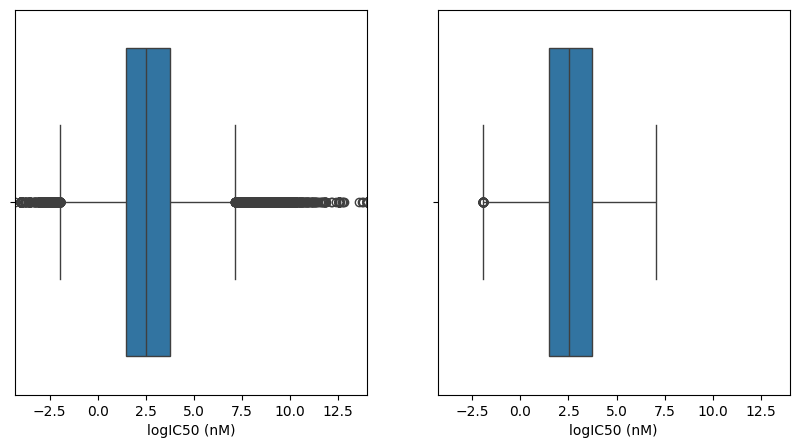

In [149]:
#find kd (nM) values outliars
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#sns.boxplot(x=bindingdb_df2["logKd"])


from scipy import stats

# Calculate Z-scores for each value
z_scores = stats.zscore(bindingdb_df2_addedSeq[paramlog])

# Define the threshold for outliers (usually Z > 3 or Z < -3)
outlier_threshold = 3

# Find values that are outliers
outliers = bindingdb_df2_addedSeq[abs(z_scores) > outlier_threshold]
print(f"Number of outliers: {len(outliers)}")




# Remove outliers
bindingdb_df3 = bindingdb_df2_addedSeq[abs(z_scores) <= outlier_threshold]

print(f"Remaining rows: {len(bindingdb_df3)}")


#plot . before and after removing outliars
plt.figure(figsize=(10, 5))

# Get the min and max values across both datasets for consistent x-axis limits
min_x = min(bindingdb_df2_addedSeq[paramlog].min(), bindingdb_df3[paramlog].min())
max_x = max(bindingdb_df2_addedSeq[paramlog].max(), bindingdb_df3[paramlog].max())

# Plot the first boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=bindingdb_df2_addedSeq[paramlog])
plt.xlim(min_x, max_x)  # Set the same x-axis limits

# Plot the second boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=bindingdb_df3[paramlog])
plt.xlim(min_x, max_x)  # Set the same x-axis limits

# Show the plot
plt.show()




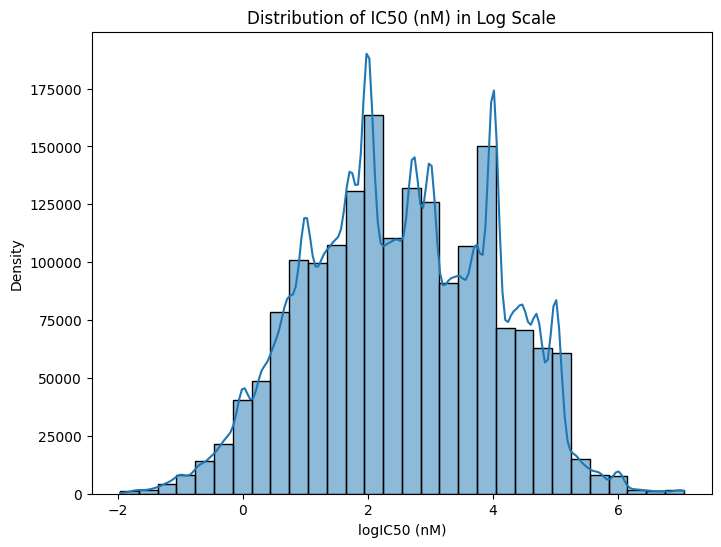

In [153]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(8, 6))

# Plot histogram and KDE on the log-transformed 'Kd (nM)' values
sns.histplot(bindingdb_df3[paramlog], kde=True, bins=30)

# Set the labels and title
plt.xlabel(f"{paramlog}")
plt.ylabel("Density")
plt.title(f"Distribution of {param} in Log Scale")

# Show the plot
plt.show()


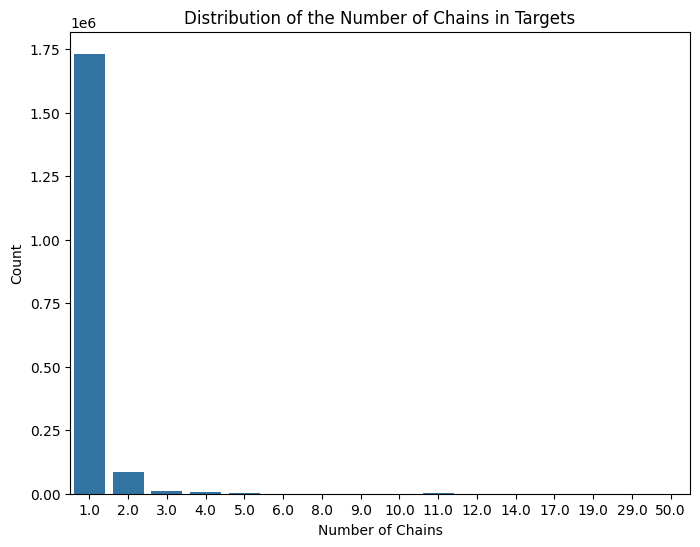

In [154]:
#show distribution of number of chains
import seaborn as sns
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(8, 6))

# Plot the distribution of the number of chains
sns.countplot(data=bindingdb_df3, x="Chain number")

# Set the labels and title
plt.xlabel("Number of Chains")
plt.ylabel("Count")
plt.title("Distribution of the Number of Chains in Targets")

# Show the plot
plt.show()


In [155]:
#remove rows with more than 1 chain
bindingdb_df4 = bindingdb_df3[bindingdb_df3["Chain number"] == 1.0]
bindingdb_df4

,BindingDB Reactant_set_id,PDB ID(s) for Ligand-Target Complex,Ligand HET ID in PDB,UniProt (SwissProt) Primary ID of Target Chain,SMILES,Ki (nM),IC50 (nM),Kd (nM),EC50 (nM),kon (M-1-s-1),koff (s-1),pH,Temp C,Sequence,Organism,Source,Chain number,SeqViaUniprot,logIC50 (nM)
142,143.0,None,None,P08684,[H]c1nc2c(nc(-c3c(C([H])([H])[H])nn(C([H])([H]...,NaN,50500.0,NaN,NaN,NaN,NaN,NaN,NaN,MALIPDLAMETWLLLAVSLVLLYLYGTHSHGLFKKLGIPGPTPLPF...,Homo sapiens,US Patent,1.0,0,4.703291
144,145.0,None,None,P51570,[H]c1c([H])c([H])c2oc(N([H])C3=N[C@@]4(C5=C(N3...,NaN,6676.9,NaN,NaN,NaN,NaN,NaN,NaN,MALRLVADFDLGKDVLPWLRAQRAVSEASGAGSGGADVLENDYESL...,None,US Patent,1.0,1,3.824575
180,181.0,"[1HIH, 1HII]",C20,P12497,[H]O[C@@]([H])(C([H])([H])N(N([H])C(=O)[C@@]([...,NaN,8.5,NaN,NaN,NaN,NaN,6.0,37.0,PQITLWQRPL VTIKIGGQLK EALLDTGADD TVLEEMNLPG RW...,Human immunodeficiency virus 1,Curated from the literature by BindingDB,1.0,0,0.929419
181,182.0,None,None,P12497,[H]O[C@@]([H])(C([H])([H])N(N([H])C(=O)[C@@]([...,NaN,177.0,NaN,NaN,NaN,NaN,6.0,37.0,PQITLWQRPL VTIKIGGQLK EALLDTGADD TVLEEMNLPG RW...,Human immunodeficiency virus 1,Curated from the literature by BindingDB,1.0,0,2.247973
183,184.0,None,None,P12497,[H]O[C@@]([H])(C([H])([H])N(N([H])C(=O)[C@@]([...,NaN,164.0,NaN,NaN,NaN,NaN,6.0,37.0,PQITLWQRPL VTIKIGGQLK EALLDTGADD TVLEEMNLPG RW...,Human immunodeficiency virus 1,Curated from the literature by BindingDB,1.0,0,2.214844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2826910,51508307.0,None,None,P17706,COc1ccc2c(c1O)C(=O)c1cc(O[C@@H]3O[C@H](CO[C@@H...,NaN,101000.0,NaN,NaN,NaN,NaN,NaN,NaN,MPTTIEREFEELDTQRRWQPLYLEIRNESHDYPHRVAKFPENRNRN...,Homo sapiens,ChEMBL,1.0,0,5.004321
2826911,51508308.0,None,None,P17706,Cc1c(O[C@@H]2O[C@H](CO[C@@H]3OC[C@@H](O)[C@H](...,NaN,78000.0,NaN,NaN,NaN,NaN,NaN,NaN,MPTTIEREFEELDTQRRWQPLYLEIRNESHDYPHRVAKFPENRNRN...,Homo sapiens,ChEMBL,1.0,0,4.892095
2826912,51508309.0,None,None,P17706,O=C1c2ccccc2C(=O)c2c1cc(O)c(CO[C@@H]1O[C@H](CO...,NaN,101000.0,NaN,NaN,NaN,NaN,NaN,NaN,MPTTIEREFEELDTQRRWQPLYLEIRNESHDYPHRVAKFPENRNRN...,Homo sapiens,ChEMBL,1.0,0,5.004321
2826913,51508310.0,None,None,P17706,COc1ccc2c(c1)C(=O)c1cc(O[C@@H]3O[C@H](CO)[C@@H...,NaN,101000.0,NaN,NaN,NaN,NaN,NaN,NaN,MPTTIEREFEELDTQRRWQPLYLEIRNESHDYPHRVAKFPENRNRN...,Homo sapiens,ChEMBL,1.0,0,5.004321


In [156]:
none_count = bindingdb_df4["Sequence"].isna().sum()
non_none_count = bindingdb_df4["Sequence"].notna().sum()

print(f"Number of 'None' sequences: {none_count}")
print(f"Number with sequences: {non_none_count}")

#remove rows with no sequence
bindingdb_df5 = bindingdb_df4.dropna(subset=["Sequence"])

Number of 'None' sequences: 12
Number with sequences: 1731550


In [157]:
bindingdb_df_final=bindingdb_df5

In [158]:
# Filter for extreme binding cases and assign labels
extreme_binding_df = bindingdb_df_final[
    (bindingdb_df_final[param] < 10) | (bindingdb_df_final[param] > 10100)
].copy()

# Assign labels: 1 for Kd (nM) < 100, 0 for Kd (nM) > 100000
extreme_binding_df["Y"] = extreme_binding_df[param].apply(lambda x: 1 if x < 100 else 0)

# remove "PDB ID(s) for Ligand-Target Complex" column
# make unique rows
extreme_binding_df = extreme_binding_df.drop(columns=["PDB ID(s) for Ligand-Target Complex"]).drop_duplicates()

print(f"extreme_binding_df rows: ",len(extreme_binding_df))
print(extreme_binding_df["Y"].value_counts())


extreme_binding_df rows:  579732
Y
0    294780
1    284952
Name: count, dtype: int64


In [159]:
# Milder thresholds for binding cases and assign labels
mild_binding_df = bindingdb_df_final[
    (bindingdb_df_final[param] < 1000) | (bindingdb_df_final[param] > 10000)
].copy()

# Assign labels: 1 for Kd (nM) < 100, 0 for Kd (nM) > 100000
mild_binding_df["Y"] = mild_binding_df[param].apply(lambda x: 1 if x < 1000 else 0)

mild_binding_df = mild_binding_df.drop(columns=["PDB ID(s) for Ligand-Target Complex"]).drop_duplicates()

# Display the new dataset and label distribution
print(f"mild_binding_df rows: ", len(mild_binding_df))
print(mild_binding_df["Y"].value_counts())


mild_binding_df rows:  1408661
Y
1    1054330
0     354331
Name: count, dtype: int64


In [160]:
# Milder thresholds for binding cases and assign labels
soft_binding_df = bindingdb_df_final

# Assign labels: 1 for Kd (nM) < 100, 0 for Kd (nM) > 100000
soft_binding_df["Y"] = soft_binding_df[param].apply(lambda x: 1 if x < 10000 else 0)

# Display the new dataset and label distribution
print(f"soft_binding_df rows: ", len(soft_binding_df))
print(soft_binding_df["Y"].value_counts())



soft_binding_df rows:  1731550
Y
1    1370235
0     361315
Name: count, dtype: int64


/var/folders/98/hv8x634d1fg2b1_0kpth665h0000gn/T/ipykernel_9028/3300003086.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soft_binding_df["Y"] = soft_binding_df[param].apply(lambda x: 1 if x < 10000 else 0)


In [162]:
#create csv and zip files
extreme_binding_df.to_csv("../../local data/BindingDB/BindingDB_extreme_binding-IC50_1chain_SequenceBased.csv",index=False)
mild_binding_df.to_csv("../../local data/BindingDB/BindingDB_mild_binding-IC50_1chain_SequenceBased.csv",index=False)
soft_binding_df.to_csv("../../local data/BindingDB/BindingDB_soft_binding-IC50_1chain_SequenceBased.csv",index=False)

import zipfile
with zipfile.ZipFile("../../local data/BindingDB/BindingDB_extreme_binding-IC50_1chain_SequenceBased.zip", 'w') as z:
    z.write("../../local data/BindingDB/BindingDB_extreme_binding-IC50_1chain_SequenceBased.csv")
with zipfile.ZipFile("../../local data/BindingDB/BindingDB_mild_binding-IC50_1chain_SequenceBased.zip", 'w') as z:
    z.write("../../local data/BindingDB/BindingDB_mild_binding-IC50_1chain_SequenceBased.csv")
with zipfile.ZipFile("../../local data/BindingDB/BindingDB_soft_binding-IC50_1chain_SequenceBased.zip", 'w') as z:
    z.write("../../local data/BindingDB/BindingDB_soft_binding-IC50_1chain_SequenceBased.csv")
    